# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:

Gray world algorithm
Scale-by-max algorithm
You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

## Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

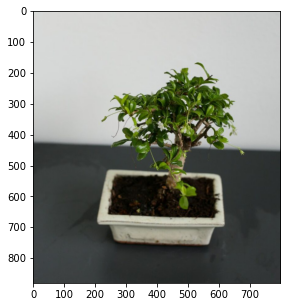

In [2]:
img = cv2.imread('../data/source2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [3]:
# Define white patch and the coefficients
row, col = 410, 750
white = img[row, col, :]
coeffs = 255.0/white
print(white)

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
    
# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

[192 194 193]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x288bab99940>)

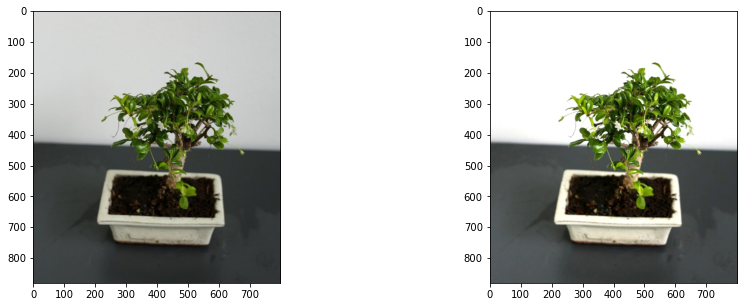

In [4]:
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

# Gray world
This algorithm assumes that a scene, on average, is gray.

In [5]:
# Load your image
img = cv2.imread('../data/source2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
r, g, b = cv2.split(img)
mean_r = np.mean(r)
mean_g = np.mean(g)
mean_b = np.mean(b)

mx = max(mean_r, mean_g, mean_b)
print("r =", mean_r, " g =", mean_g, " b =", mean_b)
print("max = ", mx, "\nchannel:", "red" if mx == mean_r else "green" if mx == mean_g else "blue")

r = 121.78571590909091  g = 125.06637926136364  b = 116.51084517045454
max =  125.06637926136364 
channel: green


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x288baa3f970>)

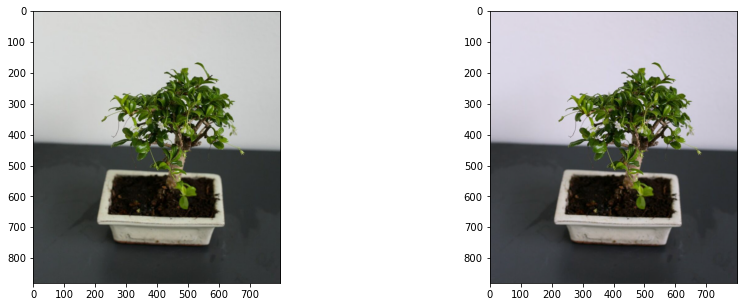

In [6]:
# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_g / mean_r
kg = 1
kb = mean_g / mean_b

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img[..., 0] * kr
balanced[..., 1] = img[..., 1] * kg
balanced[..., 2] = img[..., 2] * kb

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

# Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

240 242 243


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x288bab3ac40>)

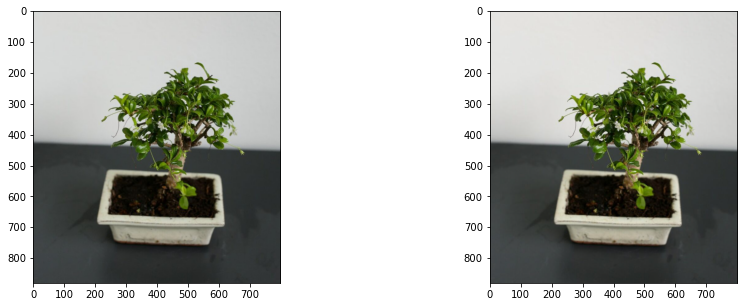

In [7]:
# Load your image
img = cv2.imread('../data/source2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
r, g, b = cv2.split(img)
max_r = np.amax(r)
max_g = np.amax(g)
max_b = np.amax(b)

print(max_r, max_g, max_b)

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img[..., 0] / max_r
balanced[..., 1] = img[..., 1] / max_g
balanced[..., 2] = img[..., 2] / max_b

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)